# DEVELOPERSHUB SUMMER AI/ML Internship Task 06
# Developed by Muhammad Usman
# HOUSE PRICE PREDICTION

## IMPORT IMPORTANT LIBRARIES

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

## DATA LOADING

In [21]:
data=pd.read_csv('C:/Users/Dell/Downloads/archive/Housing.csv')
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## DATA PREPROCESSING

In [22]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [23]:
# Copy the data
df = data.copy()
# Encode binary yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
# Define features and target
X = df.drop('price', axis=1)
y = df['price']
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## MODEL TRAINING, ERRORS AND EVALUATION

In [24]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_test)

gbr_mae = mean_absolute_error(y_test, gbr_preds)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_preds))

print(f"Gradient Boosting\nMAE: {gbr_mae:.2f} | RMSE: {gbr_rmse:.2f}")


Gradient Boosting
MAE: 960714.33 | RMSE: 1299273.84


## VISUALIZING PREDICTED VS ACTUAL 

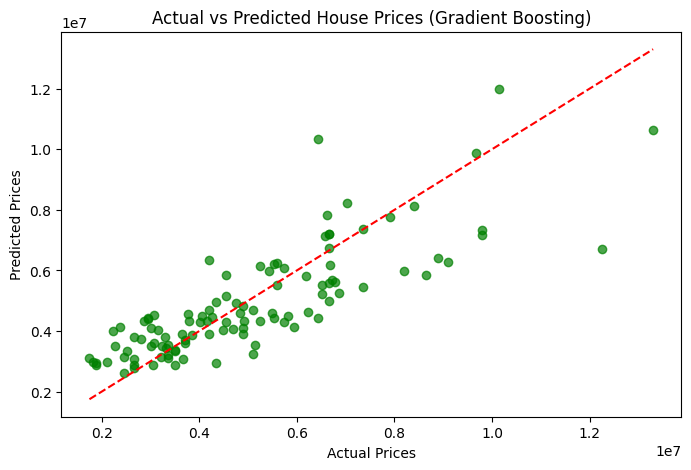

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, gbr_preds, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Gradient Boosting)")
plt.show()
